In [2]:
from __future__ import print_function
#import glob
#import sys
import time
import numpy as np
import matplotlib.pylab as plt
from scipy import misc
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
#from keras.layers import LSTM, Dense
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
image_size = 2700
# load training data
image_array = np.zeros((1, image_size))
label_array = np.zeros((1, 4), 'float')

In [4]:
batch_size = 128
num_classes = 4
epochs = 100
num_epochs=100
# input image dimensions
img_x, img_y = 30, 90
#
X = np.load('/home/nextgen/Documents/drone_detection_models/Drone_Det_CNN/Training_Data/Combined_Images.npy')
Y = np.load('/home/nextgen/Documents/drone_detection_models/Drone_Det_CNN/Training_Data/Combined_Labels.npy')
print('Shape of X:',X.shape)

Shape of X: (5222, 30, 90)


In [5]:
#rehaping the data

X = X.reshape(5222,2700)
y = Y.reshape(5222,4)

#Splitting the data set
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.3)

# convert the data to the right type
train = train.astype('float32')
test = test.astype('float32')
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')
##Convert labels to categorical 
#y_train = keras.utils.to_categorical(y_train, num_classes=4)
#y_test = keras.utils.to_categorical(y_test, num_classes=4)

print('x_train shape:', train.shape)
print(test.shape[0], 'test samples')
image_size=img_x*img_y

x_train shape: (3655, 2700)
1567 test samples


In [6]:
##======model=============
# Initialising the ANN
classifier = Sequential()

# Adding the input layer 

classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_shape = (2700,)))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

# Adding the first hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

# Adding the second hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

# Adding the output  layer, 
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
#===================Model End==========


# Compiling the ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Viewing model_configuration
classifier.summary()
classifier.get_config()
classifier.layers[0].get_config()
classifier.layers[0].input_shape
classifier.layers[0].output_shape
classifier.layers[0].get_weights()
np.shape(classifier.layers[0].get_weights()[0])
classifier.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                86432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
__________

True

In [7]:
epochs = num_epochs
validation_data=(test, test_labels)

In [8]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

#early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,checkpoint]

#Fit Data
hist = classifier.fit(train, train_labels, batch_size = batch_size,verbose=1, epochs = num_epochs, validation_data=(test, test_labels),callbacks=callbacks_list)

Train on 3655 samples, validate on 1567 samples
Epoch 1/100
3655/3655 [==============================] - 0s 132us/step - loss: 0.5138 - acc: 0.7458 - val_loss: 0.4922 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.49221, saving model to Best-weights-my_model-001-0.5138-0.7458.hdf5
Epoch 2/100
3655/3655 [==============================] - 0s 61us/step - loss: 0.4937 - acc: 0.7472 - val_loss: 0.4843 - val_acc: 0.7500

Epoch 00002: val_loss improved from 0.49221 to 0.48429, saving model to Best-weights-my_model-002-0.4937-0.7472.hdf5
Epoch 3/100
3655/3655 [==============================] - 0s 74us/step - loss: 0.4855 - acc: 0.7547 - val_loss: 0.4700 - val_acc: 0.7813

Epoch 00003: val_loss improved from 0.48429 to 0.47004, saving model to Best-weights-my_model-003-0.4855-0.7547.hdf5
Epoch 4/100
3655/3655 [==============================] - 0s 75us/step - loss: 0.4690 - acc: 0.7755 - val_loss: 0.4526 - val_acc: 0.7982

Epoch 00004: val_loss improved from 0.47004 to 0.45259, 

3655/3655 [==============================] - 0s 42us/step - loss: 0.3584 - acc: 0.8310 - val_loss: 0.3439 - val_acc: 0.8325

Epoch 00036: val_loss did not improve from 0.32951
Epoch 37/100
3655/3655 [==============================] - 0s 43us/step - loss: 0.3562 - acc: 0.8287 - val_loss: 0.3442 - val_acc: 0.8318

Epoch 00037: val_loss did not improve from 0.32951
Epoch 38/100
3655/3655 [==============================] - 0s 41us/step - loss: 0.3523 - acc: 0.8291 - val_loss: 0.3341 - val_acc: 0.8371

Epoch 00038: val_loss did not improve from 0.32951
Epoch 39/100
3655/3655 [==============================] - 0s 38us/step - loss: 0.3544 - acc: 0.8270 - val_loss: 0.3615 - val_acc: 0.8357

Epoch 00039: val_loss did not improve from 0.32951
Epoch 40/100
3655/3655 [==============================] - 0s 39us/step - loss: 0.3514 - acc: 0.8326 - val_loss: 0.3341 - val_acc: 0.8425

Epoch 00040: val_loss did not improve from 0.32951
Epoch 41/100
3655/3655 [==============================] - 0s 43us/st

3655/3655 [==============================] - 0s 46us/step - loss: 0.3292 - acc: 0.8364 - val_loss: 0.2972 - val_acc: 0.8714

Epoch 00076: val_loss did not improve from 0.28942
Epoch 77/100
3655/3655 [==============================] - 0s 41us/step - loss: 0.3277 - acc: 0.8421 - val_loss: 0.2937 - val_acc: 0.8720

Epoch 00077: val_loss did not improve from 0.28942
Epoch 78/100
3655/3655 [==============================] - 0s 41us/step - loss: 0.3273 - acc: 0.8404 - val_loss: 0.2943 - val_acc: 0.8711

Epoch 00078: val_loss did not improve from 0.28942
Epoch 79/100
3655/3655 [==============================] - 0s 45us/step - loss: 0.3256 - acc: 0.8397 - val_loss: 0.3046 - val_acc: 0.8661

Epoch 00079: val_loss did not improve from 0.28942
Epoch 80/100
3655/3655 [==============================] - 0s 43us/step - loss: 0.3284 - acc: 0.8387 - val_loss: 0.2918 - val_acc: 0.8725

Epoch 00080: val_loss did not improve from 0.28942
Epoch 81/100
3655/3655 [==============================] - 0s 37us/st

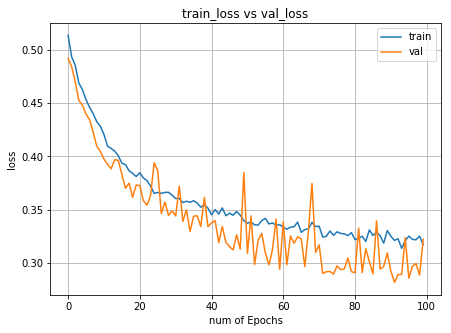

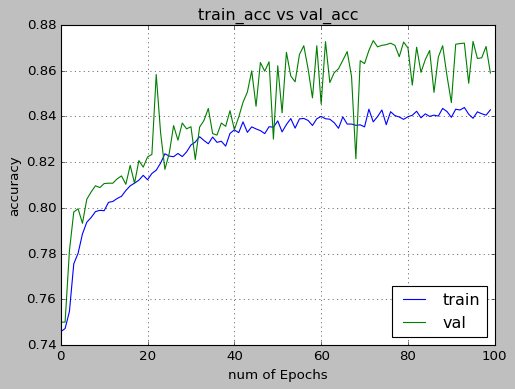

In [9]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(test)
y_pred = (y_pred > 0.5)

test_rate = np.mean(y_pred == test_labels)
print ('Test accuracy: ', "{0:.2f}%".format(test_rate * 100))

Test accuracy:  85.90%


In [ ]:
# save model
classifier.save('Saved_Weights.h5')